# 차선 인식

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. 컬러영상 흑백으로 바꾸기

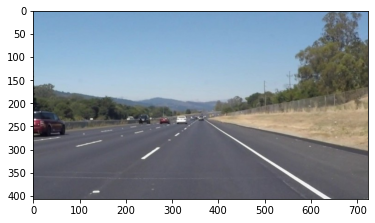

In [2]:
roi = cv.imread('road.jpeg')
b,g,r = cv.split(roi)
img = cv.merge([r,g,b])
plt.imshow(img)

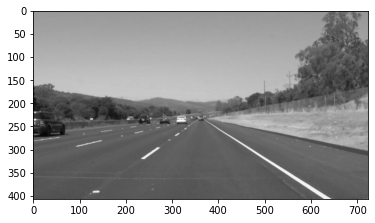

In [3]:
roi_gray = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
plt.imshow(roi_gray, cmap='gray')

## Threshhold(Optional)

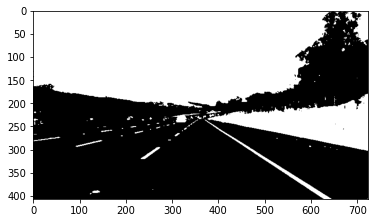

In [4]:
ret, thresh = cv.threshold(roi_gray,127,255,cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

## 2. 엣지 검출(Canny Edge)

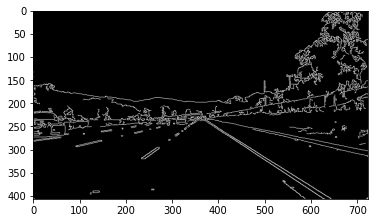

In [5]:
edge_img = cv.Canny(roi_gray,50,150)
plt.imshow(edge_img,cmap='gray')

## 3. 허프변환(Hough Transform)으로 직선검출

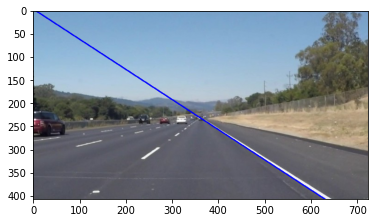

In [9]:
output = img.copy()
lines = cv.HoughLines(edge_img, 1, np.pi / 180, 50, None, 0, 0)
line = lines[0]
for rho,theta in line:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(output,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(output)

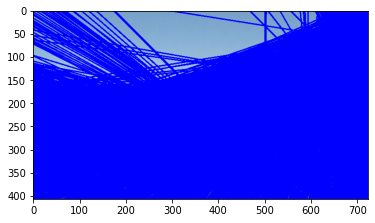

In [7]:
output = img.copy()
lines = cv.HoughLines(edge_img, 1, np.pi / 180, 50, None, 0, 0)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(output,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(output)